# **CASE: AVALIAÇÃO DE CANDIDATOS**

---

### Instalação de bibliotecas

In [2]:
# Para visualização dos clusters com k-médias
install.packages("factoextra")
# Para criação de grid de gráficos
install.packages("gridExtra")
# Para utilização do algoritmo k-medoides
install.packages("cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Carregamento de bibliotecas

In [3]:
library(tidyverse) # já pré-instalado, se for em Google Colab
library(factoextra)
library(gridExtra)
library(cluster)

### Leitura da base de dados

In [5]:
dados_candidatos <- read.table(file   = "../Dados/Avaliacao_Candidatos.txt",
                               sep    = "\t",
                               header = TRUE)

### Visualização da base de dados

In [6]:
View(dados_candidatos)

Candidato,Tempo_Experiencia,Qtde_Cursos_Especializacoes,Idade,Area_Formacao,Salario_Atual,Nivel_Hierarquico_Atual
<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>
Ana,9,9,33,Engenharia,9500,Senior
Beatriz,3,4,26,Ciencia_Computacao,6000,Pleno
Carlos,10,7,34,Analise_Sistemas,8000,Senior
Fernando,8,2,32,Ciencia_Computacao,7300,Senior
João,1,3,23,Engenharia,5800,Pleno
Mariana,11,1,35,Ciencia_Computacao,6400,Pleno
Paula,4,3,25,Analise_Sistemas,7000,Senior
Pedro,9,0,30,Analise_Sistemas,6500,Pleno
Ronaldo,2,5,25,Ciencia_Computacao,6200,Pleno


### Análise exploratória breve

In [7]:
# Medidas resumo
summary(dados_candidatos)

  Candidato         Tempo_Experiencia Qtde_Cursos_Especializacoes
 Length:10          Min.   : 1.00     Min.   :0.00               
 Class :character   1st Qu.: 3.25     1st Qu.:2.25               
 Mode  :character   Median : 8.50     Median :3.50               
                    Mean   : 6.90     Mean   :4.20               
                    3rd Qu.: 9.75     3rd Qu.:6.50               
                    Max.   :12.00     Max.   :9.00               
     Idade       Area_Formacao      Salario_Atual  Nivel_Hierarquico_Atual
 Min.   :23.00   Length:10          Min.   :5800   Length:10              
 1st Qu.:25.25   Class :character   1st Qu.:6250   Class :character       
 Median :31.00   Mode  :character   Median :6750   Mode  :character       
 Mean   :30.10                      Mean   :7100                          
 3rd Qu.:33.75                      3rd Qu.:7825                          
 Max.   :38.00                      Max.   :9500                          

In [8]:
# Tabela de frequências: área de formação
table(dados_candidatos$Area_Formacao)
prop.table(table(dados_candidatos$Area_Formacao))


  Analise_Sistemas Ciencia_Computacao         Engenharia 
                 3                  4                  3 


  Analise_Sistemas Ciencia_Computacao         Engenharia 
               0.3                0.4                0.3 

In [9]:
# Tabela de frequências: nível hierárquico
table(dados_candidatos$Nivel_Hierarquico_Atual)
prop.table(table(dados_candidatos$Nivel_Hierarquico_Atual))


 Pleno Senior 
     5      5 


 Pleno Senior 
   0.5    0.5 

### Padronização e cálculo da matriz de distâncias

In [10]:
# Padronização das variaveis quantitativas de interesse (correspondentes às colunas 2 e 3)
dados_candidatos_padronizada <- scale(dados_candidatos[,c(2:3)])

In [11]:
# Cálculo da matriz de distâncias euclidianas
dist_candidatos <- dist(dados_candidatos_padronizada, method = "euclidean")

### Agrupamento pelo algoritmo hierárquico (com duas variáveis quantitativas)

In [12]:
# Execução do algoritmo para diferentes critérios de ligação
clust_candidatos_complete <- hclust(dist_candidatos, method = "complete")
clust_candidatos_single   <- hclust(dist_candidatos, method = "single")
clust_candidatos_average  <- hclust(dist_candidatos, method = "average")
clust_candidatos_ward     <- hclust(dist_candidatos, method = "ward.D")

In [13]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
options(repr.plot.width = 10, repr.plot.height = 10)

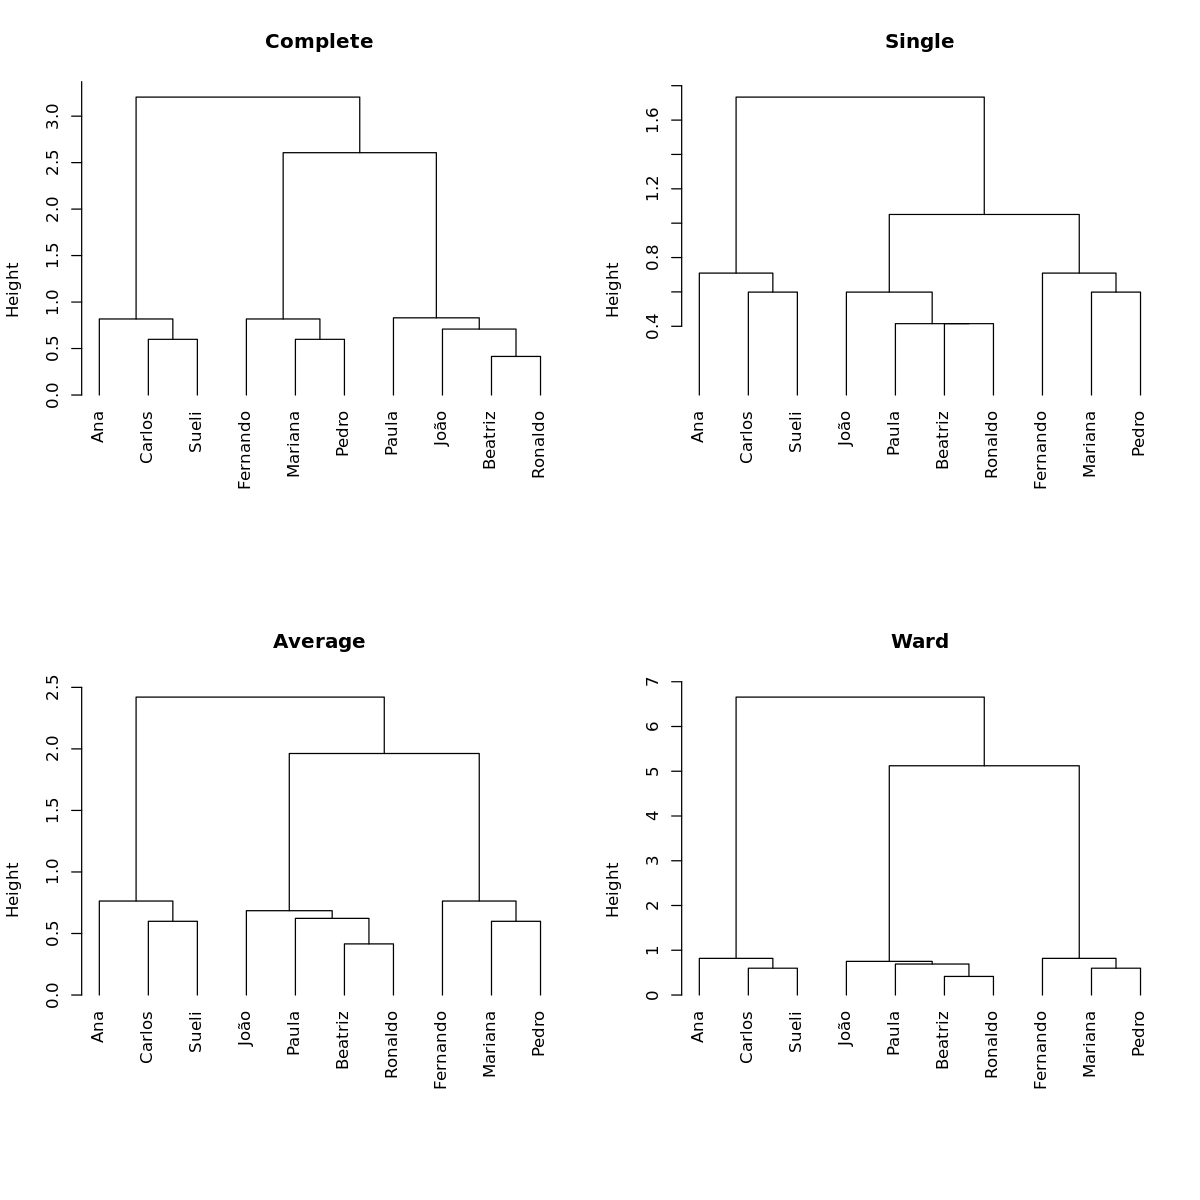

In [14]:
# Visualização dos dendrogramas resultantes
par(mfrow = c(2,2))
plot(clust_candidatos_complete, main = "Complete", hang = -1, labels = dados_candidatos$Candidato, xlab = "", sub = "")
plot(clust_candidatos_single,   main = "Single",   hang = -1, labels = dados_candidatos$Candidato, xlab = "", sub = "")
plot(clust_candidatos_average,  main = "Average",  hang = -1, labels = dados_candidatos$Candidato, xlab = "", sub = "")
plot(clust_candidatos_ward,     main = "Ward",     hang = -1, labels = dados_candidatos$Candidato, xlab = "", sub = "")

In [ ]:
# Substitua o ponto (.) pelo nome do objeto correspondente ao critério de ligação que você considera mais adequado
segmentacao_escolhida <- .  # por exemplo: clust_candidatos_single

In [ ]:
# Substitua o ponto (.) pela quantidade k de grupos que deseja, para o método escolhido
k_escolhido <- . # por exemplo: 2

In [ ]:
# Registrando os clusters da segmentação escolhida como uma nova coluna na base de dados
dados_candidatos$cluster_hierarquico <- as.factor(cutree(segmentacao_escolhida, k_escolhido))

### Análise descritiva dos clusters do algoritmo hierárquico

In [ ]:
# Gráficos de boxplot
par(mfrow = c(2,2))
boxplot(Tempo_Experiencia ~           cluster_hierarquico, data = dados_candidatos, col = "darkturquoise", xlab = "Cluster", main = "Tempo de Experiência")
boxplot(Qtde_Cursos_Especializacoes ~ cluster_hierarquico, data = dados_candidatos, col = "darkturquoise", xlab = "Cluster", main = "Qtde. de Cursos e Especializações")
boxplot(Idade ~                       cluster_hierarquico, data = dados_candidatos, col = "darkturquoise", xlab = "Cluster", main = "Idade")
boxplot(Salario_Atual ~               cluster_hierarquico, data = dados_candidatos, col = "darkturquoise", xlab = "Cluster", main = "Salário Atual")

In [ ]:
# Médias das variáveis quantitativas disponíveis
dados_candidatos %>%
  group_by(cluster_hierarquico) %>%
  summarise(tempo_experiencia_medio = round(mean(Tempo_Experiencia), 0),
            qtde_cursos_media       = round(mean(Qtde_Cursos_Especializacoes), 0),
            idade_media             = round(mean(Idade), 0),
            salario_atual_medio     = round(mean(Salario_Atual), 0)) %>%
  View()

### Agrupamento pelo algoritmo k-médias (com duas variáveis quantitativas)

In [ ]:
# Definição de semente aleatória, para reprodutibilidade dos resultados
set.seed(12345)

In [ ]:
# Execução do algoritmo para diferentes valores de k
clust_candidatos_kmedias_k2 <- kmeans(dados_candidatos_padronizada, centers = 2, nstart = 25, iter.max = 100)
clust_candidatos_kmedias_k3 <- kmeans(dados_candidatos_padronizada, centers = 3, nstart = 25, iter.max = 100)
clust_candidatos_kmedias_k4 <- kmeans(dados_candidatos_padronizada, centers = 4, nstart = 25, iter.max = 100)
clust_candidatos_kmedias_k5 <- kmeans(dados_candidatos_padronizada, centers = 5, nstart = 25, iter.max = 100)

In [ ]:
# Visualização dos clusters de forma aproximada, reduzindo para 2 dimensões
grafico_k2 <- fviz_cluster(clust_candidatos_kmedias_k2, data = dados_candidatos_padronizada, geom = "point", main = "k = 2")
grafico_k3 <- fviz_cluster(clust_candidatos_kmedias_k3, data = dados_candidatos_padronizada, geom = "point", main = "k = 3")
grafico_k4 <- fviz_cluster(clust_candidatos_kmedias_k4, data = dados_candidatos_padronizada, geom = "point", main = "k = 4")
grafico_k5 <- fviz_cluster(clust_candidatos_kmedias_k5, data = dados_candidatos_padronizada, geom = "point", main = "k = 5")
grid.arrange(grafico_k2, grafico_k3, grafico_k4, grafico_k5, nrow = 2)

In [ ]:
# Substitua o ponto (.) pelo nome do objeto correspondente ao valor de k que você considera mais adequado
segmentacao_escolhida <- .  # por exemplo: clust_candidatos_kmedias_k2

In [ ]:
# Registrando os clusters da segmentação escolhida como uma nova coluna na base de dados
dados_candidatos$cluster_kmedias <- segmentacao_escolhida$cluster

### Análise descritiva dos clusters do algoritmo k-médias

In [ ]:
# Gráficos de boxplot
par(mfrow = c(2,2))
boxplot(Tempo_Experiencia ~           cluster_kmedias, data = dados_candidatos, col = "darkturquoise", xlab = "Cluster", main = "Tempo de experiência")
boxplot(Qtde_Cursos_Especializacoes ~ cluster_kmedias, data = dados_candidatos, col = "darkturquoise", xlab = "Cluster", main = "Qtde. de cursos e especializações")
boxplot(Idade ~                       cluster_kmedias, data = dados_candidatos, col = "darkturquoise", xlab = "Cluster", main = "Idade")
boxplot(Salario_Atual ~               cluster_kmedias, data = dados_candidatos, col = "darkturquoise", xlab = "Cluster", main = "Salário atual")

In [ ]:
# Médias das variáveis quantitativas disponíveis
dados_candidatos %>%
  group_by(cluster_kmedias) %>%
  summarise(tempo_experiencia_medio = round(mean(Tempo_Experiencia), 0),
            qtde_cursos_media       = round(mean(Qtde_Cursos_Especializacoes), 0),
            idade_media             = round(mean(Idade), 0),
            salario_atual_medio     = round(mean(Salario_Atual), 0)) %>%
  View()

### Agrupamento pelo algoritmo k-medoides (com duas variáveis quantitativas e duas variáveis qualitativas)

In [ ]:
# Transformação das variáveis qualitativas em 'fatores' (requisito para o algoritmo k-medoides no R)
dados_candidatos$Area_Formacao_Factor           <- as.factor(dados_candidatos$Area_Formacao)
dados_candidatos$Nivel_Hierarquico_Atual_Factor <- as.factor(dados_candidatos$Nivel_Hierarquico_Atual)

In [ ]:
# Cálculo da matriz de distâncias para as variáveis de interesse, utilizando a distância de Gower
dist_candidatos_gower <- daisy(dados_candidatos[, c("Tempo_Experiencia",
                                                    "Qtde_Cursos_Especializacoes",
                                                    "Area_Formacao_Factor",
                                                    "Nivel_Hierarquico_Atual_Factor")],
                               metric = "gower")

In [ ]:
# Definição de semente aleatória, para reprodutibilidade dos resultados
set.seed(12345)

In [ ]:
# Execução do algoritmo para diferentes valores de k
clust_candidatos_kmedoides_k2 <- pam(dist_candidatos_gower, diss = TRUE, k = 2)
clust_candidatos_kmedoides_k3 <- pam(dist_candidatos_gower, diss = TRUE, k = 3)
clust_candidatos_kmedoides_k4 <- pam(dist_candidatos_gower, diss = TRUE, k = 4)

In [ ]:
# Registrando os clusters das simulações como novas colunas na base de dados
dados_candidatos$cluster_kmedoides_k2 <- clust_candidatos_kmedoides_k2$clustering
dados_candidatos$cluster_kmedoides_k3 <- clust_candidatos_kmedoides_k3$clustering
dados_candidatos$cluster_kmedoides_k4 <- clust_candidatos_kmedoides_k4$clustering

### Análise descritiva dos clusters do algoritmo k-medoides

### k = 2

In [ ]:
# Médias das variáveis quantitativas
dados_candidatos %>%
  group_by(cluster_kmedoides_k2) %>%
  summarise(tempo_experiencia_medio = round(mean(Tempo_Experiencia), 0),
            qtde_cursos_media       = round(mean(Qtde_Cursos_Especializacoes), 0),
            idade_media             = round(mean(Idade), 0),
            salario_atual_medio     = round(mean(Salario_Atual), 0)) %>%
  View()

In [ ]:
# Distribuições (em %) das variáveis qualitativas, por cluster
round(prop.table(table(dados_candidatos$cluster_kmedoides_k2, dados_candidatos$Area_Formacao), 1), 2)
round(prop.table(table(dados_candidatos$cluster_kmedoides_k2, dados_candidatos$Nivel_Hierarquico_Atual), 1), 2)

### k = 3

In [ ]:
# Médias das variáveis quantitativas
dados_candidatos %>%
  group_by(cluster_kmedoides_k3) %>%
  summarise(tempo_experiencia_medio = round(mean(Tempo_Experiencia), 0),
            qtde_cursos_media       = round(mean(Qtde_Cursos_Especializacoes), 0),
            idade_media             = round(mean(Idade), 0),
            salario_atual_medio     = round(mean(Salario_Atual), 0)) %>%
  View()

In [ ]:
# Distribuições (em %) das variáveis qualitativas, por cluster
round(prop.table(table(dados_candidatos$cluster_kmedoides_k3, dados_candidatos$Area_Formacao), 1), 2)
round(prop.table(table(dados_candidatos$cluster_kmedoides_k3, dados_candidatos$Nivel_Hierarquico_Atual), 1), 2)

### k = 4

In [ ]:
# Médias das variáveis quantitativas
dados_candidatos %>%
  group_by(cluster_kmedoides_k4) %>%
  summarise(tempo_experiencia_medio = round(mean(Tempo_Experiencia), 0),
            qtde_cursos_media       = round(mean(Qtde_Cursos_Especializacoes), 0),
            idade_media             = round(mean(Idade), 0),
            salario_atual_medio     = round(mean(Salario_Atual), 0)) %>%
  View()

In [ ]:
# Distribuições (em %) das variáveis qualitativas, por cluster
round(prop.table(table(dados_candidatos$cluster_kmedoides_k4, dados_candidatos$Area_Formacao), 1), 2)
round(prop.table(table(dados_candidatos$cluster_kmedoides_k4, dados_candidatos$Nivel_Hierarquico_Atual), 1), 2)